In [1]:
from erddapClient import ERDDAP_Server
from pprint import pprint
import pandas as pd 
import numpy as np


remoteServer = ERDDAP_Server('https://coastwatch.pfeg.noaa.gov/erddap')
remoteServer


<erddapClient.ERDDAP_Server>
Server version:  ERDDAP_version=2.11

In [2]:
searchResults = remoteServer.advancedSearch(searchFor="Gulf of Mexico -MODIS",
                                            minTime="2010-12-24T00:00:00Z",
                                            maxTime="2020-12-24T00:00:00Z")
searchResults

<erddapClient.ERDDAP_SearchResults>
Results:  5
[
  0 - <erddapClient.ERDDAP_Griddap> hycom_gom310D , "NRL HYCOM 1/25 deg model output, Gulf of Mexico, 10.04 Expt 31.0, 2009-2014, At Depths"
  1 - <erddapClient.ERDDAP_Griddap> hycom_gom310S , "NRL HYCOM 1/25 deg model output, Gulf of Mexico, 10.04 Expt 31.0, 2009-2014, At Surface"
  2 - <erddapClient.ERDDAP_Griddap> ucsdHfrE1 , "Currents, HF Radar, US East Coast and Gulf of Mexico, RTV, Near-Real Time, 2012-present, Hourly, 1km"
  3 - <erddapClient.ERDDAP_Griddap> ucsdHfrE2 , "Currents, HF Radar, US East Coast and Gulf of Mexico, RTV, Near-Real Time, 2012-present, Hourly, 2km"
  4 - <erddapClient.ERDDAP_Griddap> ucsdHfrE6 , "Currents, HF Radar, US East Coast and Gulf of Mexico, RTV, Near-Real Time, 2012-present, Hourly, 6km"
]

In [9]:
hfradar1km = searchResults[0]
hfradar1km

<erddapClient.ERDDAP_Griddap>
Title:       NRL HYCOM 1/25 deg model output, Gulf of Mexico, 10.04 Expt 31.0, 2009-2014, At Depths
Server URL:  https://coastwatch.pfeg.noaa.gov/erddap
Dataset ID:  hycom_gom310D
Dimensions: 
  time (double) range=(cftime.DatetimeGregorian(2009, 4, 2, 0, 0, 0, 0), cftime.DatetimeGregorian(2014, 8, 30, 0, 0, 0, 0)) 
    Standard name: time 
    Units:         seconds since 1970-01-01T00:00:00Z 
  depth (float) range=(0.0, 5500.0) 
    Standard name: depth 
    Units:         m 
  latitude (float) range=(18.09165, 31.96065) 
    Standard name: latitude 
    Units:         degrees_north 
  longitude (float) range=(-98.0, -76.40002) 
    Standard name: longitude 
    Units:         degrees_east 
Variables: 
  temperature (float) 
    Standard name: sea_water_potential_temperature 
    Units:         degC 
  salinity (float) 
    Standard name: sea_water_practical_salinity 
    Units:         psu 
  u (float) 
    Standard name: eastward_sea_water_velocity 
  

In [10]:
pprint(hfradar1km.dimensions)

{'depth': {'_CoordinateAxisType': 'Height',
           '_CoordinateZisPositive': 'down',
           '_averageSpacing': 141.02564102564102,
           '_dataType': 'float',
           '_evenlySpaced': False,
           '_nValues': 40,
           'actual_range': (0.0, 5500.0),
           'axis': 'Z',
           'ioos_category': 'Location',
           'long_name': 'Depth',
           'positive': 'down',
           'standard_name': 'depth',
           'units': 'm'},
 'latitude': {'_CoordinateAxisType': 'Lat',
              '_averageSpacing': 0.0361171875,
              '_dataType': 'float',
              '_evenlySpaced': False,
              '_nValues': 385,
              'actual_range': (18.09165, 31.96065),
              'axis': 'Y',
              'ioos_category': 'Location',
              'long_name': 'Latitude',
              'standard_name': 'latitude',
              'units': 'degrees_north'},
 'longitude': {'_CoordinateAxisType': 'Lon',
               '_averageSpacing': 0.03999996296

In [16]:
# Request the dataset as an xarray object
hfradar1km.xarray

<xarray.Dataset>
Dimensions:      (depth: 40, latitude: 385, longitude: 541, time: 1977)
Coordinates:
  * time         (time) datetime64[ns] 2009-04-02 2009-04-03 ... 2014-08-30
  * depth        (depth) float32 0.0 5.0 10.0 15.0 ... 4.5e+03 5e+03 5.5e+03
  * latitude     (latitude) float32 18.09 18.13 18.17 ... 31.89 31.93 31.96
  * longitude    (longitude) float32 -98.0 -97.96 -97.92 ... -76.48 -76.44 -76.4
Data variables:
    temperature  (time, depth, latitude, longitude) float32 ...
    salinity     (time, depth, latitude, longitude) float32 ...
    u            (time, depth, latitude, longitude) float32 ...
    v            (time, depth, latitude, longitude) float32 ...
    w_velocity   (time, depth, latitude, longitude) float32 ...
Attributes:
    cdm_data_type:              Grid
    Conventions:                COARDS, CF-1.0, ACDD-1.3
    creator_email:              hycomdata@coaps.fsu.edu
    creator_name:               Naval Research Laboratory
    creator_type:               institution
    creator_url:                https://www.hycom.org
    defaultGraphQuery:          temperature[%28last%29][0][0:%28last%29][0:%2...
    Easternmost_Easting:        -76.40002
    experiment:                 31.0
    geospatial_lat_max:         31.96065
    geospatial_lat_min:         18.09165
    geospatial_lat_units:       degrees_north
    geospatial_lon_max:         -76.40002
    geospatial_lon_min:         -98.0
    geospatial_lon_resolution:  0.039999962962962966
    geospatial_lon_units:       degrees_east
    history:                    archv2ncdf3z\n2021-03-20T07:32:36Z https://td...
    infoUrl:                    https://www.hycom.org
    institution:                Naval Research Laboratory
    keywords:                   30.1h, circulation, currents, density, Earth ...
    keywords_vocabulary:        GCMD Science Keywords
    license:                    The data may be used and redistributed for fr...
    Northernmost_Northing:      31.96065
    source:                     HYCOM archive file
    sourceUrl:                  https://tds.hycom.org/thredds/dodsC/GOMl0.04/...
    Southernmost_Northing:      18.09165
    standard_name_vocabulary:   CF Standard Name Table v70
    summary:                    NRL HYCOM 1/25 deg model output, Gulf of Mexi...
    time_coverage_end:          2014-08-30T00:00:00Z
    time_coverage_start:        2009-04-02T00:00:00Z
    title:                      NRL HYCOM 1/25 deg model output, Gulf of Mexi...
    Westernmost_Easting:        -98.0

In [14]:
hfradar1km.xarray.temperature[0,0,:,:]

<xarray.DataArray 'temperature' (latitude: 385, longitude: 541)>
[208285 values with dtype=float32]
Coordinates:
    time       datetime64[ns] 2009-04-02
    depth      float32 0.0
  * latitude   (latitude) float32 18.09 18.13 18.17 18.21 ... 31.89 31.93 31.96
  * longitude  (longitude) float32 -98.0 -97.96 -97.92 ... -76.48 -76.44 -76.4
Attributes:
    colorBarMaximum:  32.0
    colorBarMinimum:  0.0
    ioos_category:    Temperature
    long_name:        Sea Water Temperature
    standard_name:    sea_water_potential_temperature
    units:            degC
    valid_range:      [ 2.6549964 28.802729 ]

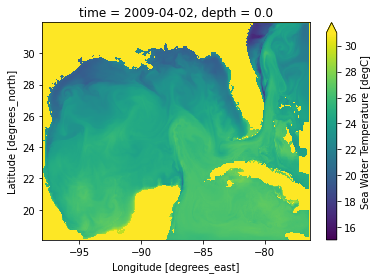

In [21]:
# Map plot

hfradar1km.xarray.temperature[0,0,:,:].plot(vmin=15,vmax=32)